# **Gradient Clipping**

Another popular technique to lessen the exploding gradients problem is to simply
clip the gradients during backpropagation so that they never exceed some threshold, it is called "Gradient Clipping".

https://arxiv.org/abs/1211.5063

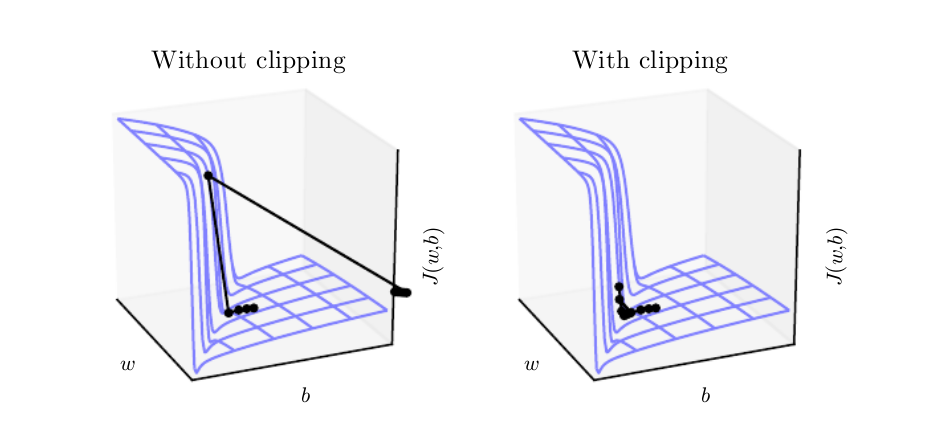

> Gradient clipping is a technique in neural network training that prevents exploding gradients by limiting their magnitude, ensuring numerical stability and preventing wild weight updates, especially in deep models like RNNs.

- as Batch Normalization is tricky to use in RNNs
- For other types of networks, BN is usually sufficient

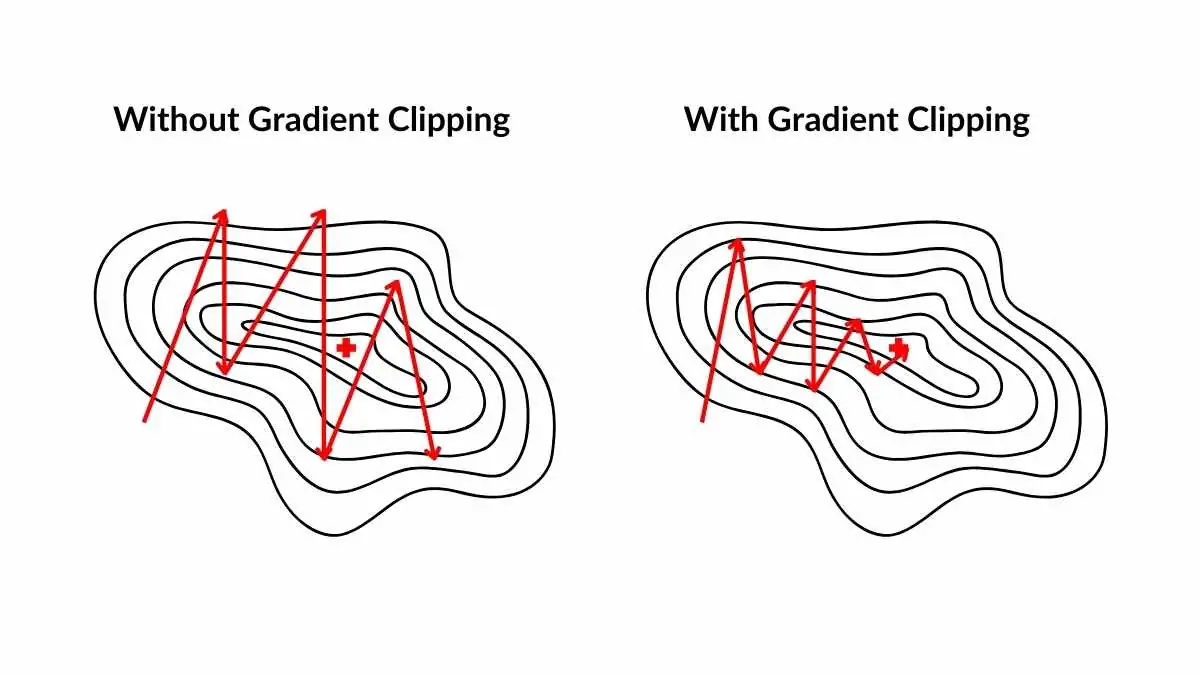

In Keras, implementing Gradient Clipping is just a matter of setting the `clipvalue` or `clipnorm` argument when creating an optimizer. For example:

```python
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)
```


- This will clip every component of the gradient vector to a value between –1.0 and 1.0.

- This means that all the partial derivatives of the loss (with regards to each and every trainable parameter) will be clipped between –1.0 and 1.0.

- The threshold is a hyper‐parameter you can tune.

If you observe that the gradients explode during training (you can track the size of the gradients using TensorBoard), you may want to try both clipping by value and clipping by norm, with different threshold, and see which option performs best on the validation set.

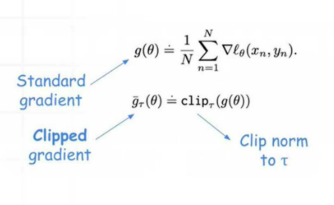


### **Gradient clipping-by-value**
The idea behind clipping-by-value is simple. We define a minimum and a maximum clip value.

If a gradient exceeds some threshold value, we clip that gradient to the threshold. If the gradient is less than the lower limit, then we clip that too, to the lower limit of the threshold.

The algorithm is as follows:

> g ← ∂C/∂W

> if ‖g‖ ≥ max_threshold or ‖g‖ ≤ min_threshold then

> g ← threshold (accordingly)

> end if

where max_threshold and min_threshold are the boundary values, and between them lies a range of values that gradients can take. g, here is the gradient, and ‖g‖ is the norm of g.

---

### **Gradient clipping-by-norm**
The idea behind clipping-by-norm is similar to clipping-by-value. The difference is that we clip the gradients by multiplying the unit vector of the gradients with the threshold.

The algorithm is as follows:

> g ← ∂C/∂W

> if ‖g‖ ≥ threshold then

> g ← threshold * g/‖g‖

> end if

where the threshold is a hyperparameter, g is the gradient, and ‖g‖ is the norm of g. Since g/‖g‖ is a unit vector, after rescaling, the new g will have a norm equal to the threshold. Note that if ‖g‖ < c, then we don’t need to do anything.


Gradient clipping ensures the gradient vector g has a norm at most equal to the threshold.

This helps gradient descent to have reasonable behavior even if the loss landscape of the model is irregular, most likely a cliff.

## **Resources**

https://neptune.ai/blog/understanding-gradient-clipping-and-how-it-can-fix-exploding-gradients-problem


---